In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.tree import export_graphviz
import graphviz

import matplotlib.pyplot as plt # to draw graphs
from sklearn.tree import plot_tree # to draw a classification tree
from sklearn.model_selection import train_test_split # to split data into training and testing sets
from sklearn.model_selection import cross_val_score # for cross validation
from sklearn.metrics import ConfusionMatrixDisplay # creates and draws a confusion matrix

import pandas as pd
import numpy as np

from collections import Counter

In [19]:
# Load data
df = pd.read_csv('sle_many_values.csv', sep = ';')

In [20]:
df = df.drop(columns=['Class'])

In [21]:
df['Class'] = [0 if x <= 7.5 else 1 for x in df['PRE (currently)']]
df = df.drop(columns=['PRE (currently)'])

In [5]:
df.columns

Index(['Age', 'Age of SLE debut', 'Age at diagnosis', 'Disease duration',
       'Height', 'Weight', 'BMI', 'PRE (in the debut of SLE)',
       'CYC (total dose in grams)', 'SLEDAI-2K', 'SDI',
       'Number of exacerbations of SLE', 'SF-36 (mental)', 'SF-36  (physical)',
       'LupusQol', 'Hb (in debut)', 'Hb (currently)', 'Er (in debut)',
       'Er  (currently)', 'Leu  (in debut)', 'Leu (currently)',
       'Tr (in debut)', 'Tr (currently)', 'ESR (in debut)', 'ESR (currently)',
       'Complement c3 (g/l)', 'Complement C4 (g/l)', 'ANF (in debut)',
       'ANF (currently)', 'Anti-dsDNA (in debut)', 'Anti-dsDNA (currently)',
       'CCI', 'CiRS (general)', 'CIRS (severity index)', 'Class'],
      dtype='object')

In [6]:
# Function to traverse the tree and retrieve nodes at the specified level
def traverse_tree(node, level, max_levels=1):
    if node < 0 or level > max_levels:
        return

    feature_index = tree.tree_.feature[node]
    feature_name = feature_names[feature_index] if feature_index >= 0 else "Leaf"
    
    f_count[feature_name] += 1

    # Traverse left child and right child nodes
    traverse_tree(tree.tree_.children_left[node], level + 1, max_levels)
    traverse_tree(tree.tree_.children_right[node], level + 1, max_levels)

In [7]:
df

,Age,Age of SLE debut,Age at diagnosis,Disease duration,Height,Weight,BMI,PRE (in the debut of SLE),CYC (total dose in grams),SLEDAI-2K,...,Complement c3 (g/l),Complement C4 (g/l),ANF (in debut),ANF (currently),Anti-dsDNA (in debut),Anti-dsDNA (currently),CCI,CiRS (general),CIRS (severity index),Class
0,46,9,32,14,152.0,62.0,26.8,15,12.0,0,...,2.01,0.30,10240,320,48.5,4.2,2,7,1.75,1
1,51,12,28,23,162.0,78.0,29.7,30,100.0,6,...,1.03,0.19,1280,1280,8.2,60.0,3,6,1.50,1
2,40,7,20,20,158.0,80.0,32.0,60,26.0,10,...,0.94,0.11,1280,320,150.7,130.0,4,7,1.17,1
3,36,15,16,20,159.0,58.0,22.9,20,0.0,2,...,0.57,0.04,2560,640,67.0,0.0,1,3,3.00,0
4,34,14,14,20,164.0,62.0,23.0,55,3.0,2,...,0.86,0.20,640,1280,44.0,10.4,1,5,2.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,41,39,40,1,180.0,73.0,22.5,15,0.0,7,...,0.81,0.14,1280,640,21.0,70.0,2,3,3.00,1
125,49,20,47,2,172.0,62.0,20.9,15,0.0,4,...,0.88,0.11,1280,160,12.0,189.0,2,7,2.33,1
126,38,29,34,4,172.0,148.0,50.0,50,1.0,2,...,0.98,0.12,320,0,32.0,12.0,1,4,2.00,1
127,35,34,34,1,164.0,65.0,24.1,60,0.0,12,...,1.11,0.16,1280,160,305.0,17.7,1,4,2.00,1


In [8]:
feature_names = df.columns.tolist()
f_count = {}
f_count['Leaf'] = 0
for f in feature_names:
    f_count[f] = 0
    

In [12]:
count_of_trees

17

In [11]:
f_count

{'Leaf': 14,
 'Age': 0,
 'Age of SLE debut': 9,
 'Age at diagnosis': 16,
 'Disease duration': 0,
 'Height': 0,
 'Weight': 4,
 'BMI': 2,
 'PRE (in the debut of SLE)': 0,
 'CYC (total dose in grams)': 0,
 'SLEDAI-2K': 17,
 'SDI': 0,
 'Number of exacerbations of SLE': 0,
 'SF-36 (mental)': 4,
 'SF-36  (physical)': 0,
 'LupusQol': 1,
 'Hb (in debut)': 2,
 'Hb (currently)': 1,
 'Er (in debut)': 1,
 'Er  (currently)': 7,
 'Leu  (in debut)': 0,
 'Leu (currently)': 0,
 'Tr (in debut)': 0,
 'Tr (currently)': 6,
 'ESR (in debut)': 16,
 'ESR (currently)': 0,
 'Complement c3 (g/l)': 2,
 'Complement C4 (g/l)': 2,
 'ANF (in debut)': 1,
 'ANF (currently)': 2,
 'Anti-dsDNA (in debut)': 2,
 'Anti-dsDNA (currently)': 10,
 'CCI': 0,
 'CiRS (general)': 0,
 'CIRS (severity index)': 0,
 'Class': 0}

In [14]:
# Sort the dictionary by values in descending order
sorted_f_count = dict(sorted(f_count.items(), key=lambda item: item[1], reverse=True))

for key in sorted_f_count.keys():
    if sorted_f_count[key] != 0:
        print (key, sorted_f_count[key])

SLEDAI-2K 17
Age at diagnosis 16
ESR (in debut) 16
Leaf 14
Anti-dsDNA (currently) 10
Age of SLE debut 9
Er  (currently) 7
Tr (currently) 6
Weight 4
SF-36 (mental) 4
BMI 2
Hb (in debut) 2
Complement c3 (g/l) 2
Complement C4 (g/l) 2
ANF (currently) 2
Anti-dsDNA (in debut) 2
LupusQol 1
Hb (currently) 1
Er (in debut) 1
ANF (in debut) 1


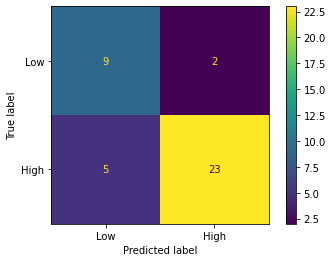

In [20]:
## plot_confusion_matrix() will run the test data down the tree and draw
## a confusion matrix.
n_tree = 4
ConfusionMatrixDisplay.from_estimator(trees[n_tree], 
                                      xtest[n_tree], 
                                      ytest[n_tree], 
                                      display_labels=["Low", "High"])

In [10]:
from sklearn.metrics import confusion_matrix

trees = []
xtest = []
ytest = []
count_of_trees = 0

for i in range(10000):
    # Split the dataframe into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis=1), df['Class'], test_size = 0.3)

    # Fit a decision tree classifier on the training data with max_depth = 3
    tree = DecisionTreeClassifier(max_depth=3)
    tree.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = tree.predict(X_test)
    
    # Calculate the accuracy of the classifier
    accuracy = accuracy_score(y_test, y_pred)
    
    # Assuming you have the true labels (y_test) and predicted labels (y_pred) from the classification tree
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    # Calculate specificity and recall
    specificity = tn / (tn + fp)
    recall = tp / (tp + fn)
    
    if (accuracy > 0.8) and (specificity > 0.8) and (recall > 0.8):
        
        trees.append(tree)
        xtest.append(X_test)
        ytest.append(y_test)
        
        traverse_tree(0, 0, max_levels=2)
        #print(f"Accuracy: {accuracy:.2f}")
        #print(f"Specificity: {specificity:.2f}")
        #print(f"Recall: {recall:.2f}")
        #print(f"----------------\n")
        
        name = f"{count_of_trees} {round(accuracy, 2)} {round(specificity, 2)} {round(recall, 2)}"
        # Export the decision tree to a dot file
        dot_data = export_graphviz(tree, out_file=None, filled=True, rounded=True, feature_names=X_train.columns, class_names=['Low', 'Hight'], impurity=False, proportion=False, precision=0, node_ids=False)

        # Convert the dot file to PDF using Graphviz
        graph = graphviz.Source(dot_data)
        graph.render(name)
        
        count_of_trees += 1
        

In [39]:
count_of_trees

21

In [55]:
# Function to traverse the tree and retrieve nodes at the specified level
def traverse_tree(node, level, max_levels=1):
    if node < 0 or level > max_levels:
        return

    feature_index = tree.tree_.feature[node]
    feature_name = feature_names[feature_index] if feature_index >= 0 else "Leaf"
    
    f_count[feature_name] += 1

    # Traverse left child and right child nodes
    traverse_tree(tree.tree_.children_left[node], level + 1, max_levels)
    traverse_tree(tree.tree_.children_right[node], level + 1, max_levels)

In [50]:
df['Anti-dsDNA (currently)']

0        4.2
1       60.0
2      130.0
3        0.0
4       10.4
       ...  
124     70.0
125    189.0
126     12.0
127     17.7
128    105.0
Name: Anti-dsDNA (currently), Length: 129, dtype: float64

In [52]:
# Select rows where class is equal to 0
selected_rows = df[df["Class"] == 0]

# Print the "Anti-dsDNA (currently)" column for the selected rows
print(selected_rows["Anti-dsDNA (currently)"])

3        0.0
4       10.4
8        7.2
9       15.3
11      34.8
14     200.0
17       0.5
19      62.0
24     200.0
26       9.9
27       4.4
29      48.0
30      56.0
31       4.8
32       7.8
33     207.0
35      33.6
36       0.9
37     200.0
38      29.2
41      32.8
44      48.1
48      13.4
55      32.0
56     194.0
67      29.7
69     103.2
70       6.8
72     200.0
73     200.0
75     200.0
79     205.0
81     201.0
83       4.2
89      83.8
90     180.0
93     200.0
94       3.4
95     124.0
98       7.5
103     17.3
108      4.2
121      4.2
123     12.2
128    105.0
Name: Anti-dsDNA (currently), dtype: float64


In [8]:
df[(df["SLEDAI-2K"] => 6) & (df["Class"] == 0)]

SyntaxError: invalid syntax (<ipython-input-8-37b5cdbcc648>, line 1)

In [9]:
df[(df["SLEDAI-2K"] > 6) & (df["Class"] == 0)]

,Age,Age of SLE debut,Age at diagnosis,Disease duration,Height,Weight,BMI,PRE (in the debut of SLE),CYC (total dose in grams),SLEDAI-2K,...,Complement c3 (g/l),Complement C4 (g/l),ANF (in debut),ANF (currently),Anti-dsDNA (in debut),Anti-dsDNA (currently),CCI,CiRS (general),CIRS (severity index),Class
17,30,13,22,8,164.0,46.0,17.1,10,2.2,10,...,0.74,0.14,640,0,94.0,0.5,1,8,2.0,0
24,28,10,23,5,164.0,58.0,20.8,40,3.0,12,...,0.81,0.08,20480,20480,265.0,200.0,1,6,2.0,0
38,26,12,24,2,180.0,66.0,20.4,30,0.0,8,...,0.65,0.05,20480,20480,82.0,29.2,1,4,2.0,0
90,41,39,39,2,158.0,53.0,21.2,15,0.0,8,...,0.72,0.11,1280,320,203.3,180.0,2,6,2.0,0


In [10]:
df[(df["SLEDAI-2K"] > 6) & (df["Class"] == 1)]

,Age,Age of SLE debut,Age at diagnosis,Disease duration,Height,Weight,BMI,PRE (in the debut of SLE),CYC (total dose in grams),SLEDAI-2K,...,Complement c3 (g/l),Complement C4 (g/l),ANF (in debut),ANF (currently),Anti-dsDNA (in debut),Anti-dsDNA (currently),CCI,CiRS (general),CIRS (severity index),Class
2,40,7,20,20,158.0,80.0,32.00,60,26.0,10,...,0.94,0.11,1280,320,150.70,130.0,4,7,1.17,1
6,37,17,19,18,163.0,48.0,18.00,60,27.0,14,...,0.53,0.12,10280,5120,216.00,200.0,1,5,2.50,1
12,34,11,22,11,167.0,75.0,26.90,60,0.0,8,...,0.74,0.11,640,160,150.00,70.0,1,6,1.50,1
16,32,17,28,4,169.0,56.0,20.60,60,5.0,10,...,0.39,0.04,1280,40960,400.00,200.0,1,8,1.60,1
20,41,17,18,23,151.0,40.0,17.50,80,20.0,8,...,0.61,0.15,160,160,3.30,400.0,3,4,2.00,1
21,35,14,28,7,161.0,69.0,26.60,20,0.0,11,...,1.31,0.12,320,160,208.80,44.0,3,7,1.75,1
22,37,16,35,2,168.0,55.0,19.50,15,0.0,8,...,0.75,0.08,20480,20480,14.30,38.5,1,3,3.00,1
40,33,17,32,1,160.0,52.0,20.30,30,0.0,8,...,0.85,0.07,1280,5120,200.00,200.0,1,5,2.50,1
42,31,16,28,2,165.0,57.0,20.90,30,0.0,14,...,0.49,0.08,320,160,65.40,90.0,1,4,2.00,1
49,27,16,26,1,170.0,54.0,17.80,30,8.0,7,...,1.05,0.20,1280,320,26.00,177.0,1,4,2.00,1


In [78]:
# Drop the row with index 17
df = df.drop(90)

In [75]:
df[(df["SLEDAI-2K"] > 6) & (df["Class"] == 0)]

,Age,Age of SLE debut,Age at diagnosis,Disease duration,Height,Weight,BMI,PRE (in the debut of SLE),CYC (total dose in grams),SLEDAI-2K,...,Complement c3 (g/l),Complement C4 (g/l),ANF (in debut),ANF (currently),Anti-dsDNA (in debut),Anti-dsDNA (currently),CCI,CiRS (general),CIRS (severity index),Class
24,28,10,23,5,164.0,58.0,20.8,40,3.0,12,...,0.81,0.08,20480,20480,265.0,200.0,1,6,2.0,0
38,26,12,24,2,180.0,66.0,20.4,30,0.0,8,...,0.65,0.05,20480,20480,82.0,29.2,1,4,2.0,0
90,41,39,39,2,158.0,53.0,21.2,15,0.0,8,...,0.72,0.11,1280,320,203.3,180.0,2,6,2.0,0
